# Import Library

In [1]:
import geopandas as gpd
import pandas as pd
from osgeo import ogr
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors
import random
import seaborn as sn

# Line Chart

In [16]:
list(mcolors.TABLEAU_COLORS.values())

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [24]:
def line_plot(data, path, ylimmax) :
    #colors = list(mcolors.TABLEAU_COLORS.values())
    #markers = ["s", "x", "o"]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#000000']
    #colors = ['#574E83', '#000000', '#FF487E']
    column = data.iloc[:,1:]
    #column = ["Male", "Both sexes", "Female"]

    r = 0 
    for i in column:
        if colors[r] == "#000000" :
            linewidth = 3
        else:
            linewidth = 1.5
        lines = plt.plot('year', i, data = data)
        plt.setp(
            lines, 
            color = colors[r], 
            #marker = markers[r], 
            linewidth = linewidth)
        r = r + 1

    plt.legend(
        column,
        loc = 'center left',
        bbox_to_anchor = (1.02, 0.5),
        prop = {'size': 18})

    plt.xticks(rotation='vertical')
    plt.ylim(0, ylimmax)
    plt.ylabel("suicide rates (per 100k)")

    plt.rcParams['figure.figsize'] = [16, 6]
    plt.rcParams['font.size'] = 18
    plt.savefig(
        'picture/line_chart/{}.png'.format(path),
        dpi=300,
        format='png',
        bbox_inches='tight')
    plt.show()

## Both sexes

### Prepare data

In [ ]:
# global age-standardized suicide rates
data = pd.read_csv("datasets/Global suicides/age_adjusted_both.csv")

# shape file
global_map = gpd.read_file("datasets/Global suicides/countries/countries.shp")
global_map = global_map.iloc[:, [4,5]]

data_merge = data.merge(global_map, on = "name")
data = data_merge[[
    'name', 'continent',
    "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009",
    "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]]

data_continent = data.groupby(['continent']).mean().rename_axis(columns = None).reset_index()

data_global_mean = list(data.mean())

data_continent = pd.melt(
    data_continent,
    id_vars = 'continent',
    value_vars = [
        '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
        '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
data_continent.rename(columns = {"variable":"year"}, inplace = True)

data_continent = data_continent.pivot_table(
    values='value', index='year', columns='continent').rename_axis(columns = None).reset_index()
data_continent["Global"] = data_global_mean
data_continent

In [3]:
def define_regions(province) :

  Northern = [
    'Chiang Mai', 'Chiang Rai', 'Lampang',
    'Lamphun', 'Mae Hong Son', 'Nan',
    'Phayao', 'Phrae', 'Uttaradit']
  Northeastern = [
    'Amnat Charoen', 'Bueng Kan', 'Buri Ram',
    'Chaiyaphum', 'Kalasin', 'Khon Kaen',
    'Loei', 'Maha Sarakham', 'Mukdahan',
    'Nakhon Phanom', 'Nakhon Ratchasima',
    'Nong Bua Lamphu', 'Nong Khai', 'Roi Et',
    'Sakon Nakhon', 'Si Sa Ket', 'Surin',
    'Ubon Ratchathani', 'Udon Thani', 'Yasothon']
  Central = [
    'Kamphaeng Phet', 'Phetchabun','Phichit',
    'Phitsanulok', 'Sukhothai','Nakhon Sawan',
    'Uthai Thani', 'Ang Thong', 'Bangkok Metropolis',
    'Chai Nat', 'Lop Buri', 'Nakhon Pathom',
    'Nonthaburi', 'Pathum Thani', 'Phra Nakhon Si Ayutthaya',
    'Samut Prakan', 'Samut Sakhon', 'Samut Songkhram',
    'Saraburi', 'Sing Buri', 'Suphan Buri', 'Nakhon Nayok']
  Eastern = [
    'Chachoengsao', 'Chanthaburi', 'Chon Buri',
    'Prachin Buri', 'Rayong', 'Sa Kaeo', 'Trat']
  Western = [
    'Phetchaburi', 'Prachuap Khiri Khan', 'Tak',
    'Kanchanaburi', 'Ratchaburi']
  Southern = [
    'Chumphon', 'Nakhon Si Thammarat', 'Narathiwat',
    'Pattani', 'Phatthalung', 'Songkhla',
    'Surat Thani', 'Yala', 'Krabi', 'Phang Nga',
    'Phuket', 'Ranong', 'Satun', 'Trang']

  if province in Northern :
      province = 'Northern'
  elif province in Northeastern :
      province = 'Northeastern'
  elif province in Central :
      province = 'Central'
  elif province in Eastern :
      province = 'Eastern'
  elif province in Western :
      province = 'Western'
  else :
      province = 'Southern'
  
  return province

In [4]:
# Thai crude suicide rates
data = pd.read_csv("datasets/Thai suicides/crude_both.csv")
data['region'] = data['name'].apply(define_regions)
data_region = data.groupby(['region']).mean().rename_axis(columns = None).reset_index()

data_overall_mean = list(data.mean())

data_region = pd.melt(
       data_region, id_vars = 'region',
       value_vars = [
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
data_region.rename(columns = {"variable":"year"}, inplace = True)

data_region = data_region.pivot_table(
       values='value', index='year', columns='region').rename_axis(columns = None).reset_index()
data_region["Overall"] = data_overall_mean
data_region

C:\Users\USER\AppData\Local\Temp/ipykernel_30304/3877984344.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_overall_mean = list(data.mean())


,year,Central,Eastern,Northeastern,Northern,Southern,Western,Overall
0,1997,7.209143,10.766178,4.419480,13.420234,4.831813,7.705871,7.175048
1,1998,8.362985,9.943697,5.366619,16.761793,4.698576,8.723019,8.093955
2,1999,9.925857,10.167356,5.287827,17.407167,5.684158,9.084071,8.843006
3,2000,10.027224,9.517621,5.192100,15.533361,6.385736,8.408815,8.661979
4,2001,9.261906,11.329267,4.920097,14.415802,5.841578,8.225694,8.291091
5,2002,8.490503,10.519287,5.158709,15.125433,6.080890,9.838478,8.287072
6,2003,7.772397,8.386138,4.752770,15.518988,5.461689,8.309477,7.610384
7,2004,7.628299,9.011221,4.801202,13.570470,4.854426,7.541435,7.236586
8,2005,6.457723,8.905474,4.375715,12.861739,5.277354,7.392149,6.776945
9,2006,6.022349,6.844071,4.371122,12.111098,4.548847,7.623280,6.242492


### Choose Top 10 overall and top 5 each region

In [ ]:
data["mean"] = data.iloc[:,2:].mean(axis=1)
data.sort_values(by = "mean",ascending = False, inplace = True)

In [ ]:
#create dataframe divided by continent
world = data[0:10]

asia = data[data["continent"] == "Asia"]
asia.sort_values(by = "mean",ascending = False, inplace = True)
asia = asia[0:5]

europe = data[data["continent"] == "Europe"]
europe.sort_values(by = "mean",ascending = False, inplace = True)
europe = europe[0:5]

africa  = data[data["continent"] == "Africa"]
africa.sort_values(by = "mean",ascending = False, inplace = True)
africa = africa[0:5]

americas = data[data["continent"] == "Americas"]
americas.sort_values(by = "mean",ascending = False, inplace = True)
americas = americas[0:5]

oceania = data[data["continent"] == "Oceania"]
oceania.sort_values(by = "mean",ascending = False, inplace = True)
oceania = oceania[0:5]


In [ ]:
#melt & pivot into suitable dataframe for ploting
del world["continent"]
del world["mean"]

world = pd.melt(world, id_vars = 'name', value_vars = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
world.rename(columns = {"variable":"year"}, inplace = True)

world = world.pivot_table(values='value', index='year', columns='name').rename_axis(columns = None).reset_index()
world = world[["year",'Lesotho', 'Swaziland', 'Guyana', 'Russian Federation', 'Botswana',
               'Kiribati', 'Lithuania', 'Kazakhstan', 'Belarus', 'Micronesia (Federated States of)']]

del asia["continent"]
del asia["mean"]

asia = pd.melt(asia, id_vars = 'name', value_vars = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
asia.rename(columns = {"variable":"year"}, inplace = True)

asia = asia.pivot_table(values='value', index='year', columns='name').rename_axis(columns = None).reset_index()
asia = asia[["year", 'Kazakhstan', 'Republic of Korea', 'Mongolia', 'Sri Lanka', 'Japan']]

del europe["continent"]
del europe["mean"]

europe = pd.melt(europe, id_vars = 'name', value_vars = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
europe.rename(columns = {"variable":"year"}, inplace = True)

europe = europe.pivot_table(values='value', index='year', columns='name').rename_axis(columns = None).reset_index()
europe = europe[["year", 'Russian Federation', 'Lithuania', 'Belarus', 'Ukraine', 'Latvia']]

del africa["continent"]
del africa["mean"]

africa = pd.melt(africa, id_vars = 'name', value_vars = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
africa.rename(columns = {"variable":"year"}, inplace = True)

africa = africa.pivot_table(values='value', index='year', columns='name').rename_axis(columns = None).reset_index()
africa = africa[["year", 'Lesotho', 'Swaziland', 'Botswana', 'Central African Republic', 'Zimbabwe']]

del americas["continent"]
del americas["mean"]

americas = pd.melt(americas, id_vars = 'name', value_vars = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
americas.rename(columns = {"variable":"year"}, inplace = True)

americas = americas.pivot_table(values='value', index='year', columns='name').rename_axis(columns = None).reset_index()
americas = americas[["year", 'Guyana', 'Suriname', 'Uruguay', 'Haiti', 'United States of America']]

del oceania["continent"]
del oceania["mean"]

oceania = pd.melt(oceania, id_vars = 'name', value_vars = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
oceania.rename(columns = {"variable":"year"}, inplace = True)

oceania = oceania.pivot_table(values='value', index='year', columns='name').rename_axis(columns = None).reset_index()
oceania = oceania[["year", 'Kiribati', 'Micronesia (Federated States of)', 'Vanuatu', 'Solomon Islands', 'Samoa']]

### Choose Top 10 overall and top 5 each region (Thai)

In [ ]:
data["mean"] = data.iloc[:,1:27].mean(axis=1)
data.sort_values(by = "mean",ascending = False, inplace = True)

In [ ]:
#create dataframe divided by region
country = data[0:10]

northern = data[data["region"] == "Northern"]
northern.sort_values(by = "mean",ascending = False, inplace = True)
northern = northern[0:5]

northeastern = data[data["region"] == "Northeastern"]
northeastern.sort_values(by = "mean",ascending = False, inplace = True)
northeastern = northeastern[0:5]

central  = data[data["region"] == "Central"]
central.sort_values(by = "mean",ascending = False, inplace = True)
central = central[0:5]

eastern = data[data["region"] == "Eastern"]
eastern.sort_values(by = "mean",ascending = False, inplace = True)
eastern = eastern[0:5]

western = data[data["region"] == "Western"]
western.sort_values(by = "mean",ascending = False, inplace = True)
western = western[0:5]

southern = data[data["region"] == "Southern"]
southern.sort_values(by = "mean",ascending = False, inplace = True)
southern = southern[0:5]

In [ ]:
#melt & pivot into suitable dataframe for ploting
del country["region"]
del country["mean"]

country = pd.melt(
       country, id_vars = 'name',
       value_vars = [
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
country.rename(columns = {"variable":"year"}, inplace = True)

country = country.pivot_table(
       values='value',
       index='year',
       columns='name').rename_axis(columns = None).reset_index()
country = country[[
       'year','Lamphun', 'Chiang Mai', 'Chiang Rai', 'Phayao', 'Phrae',
       'Mae Hong Son', 'Rayong', 'Chanthaburi', 'Nan', 'Lampang']]

del northern["region"]
del northern["mean"]

northern = pd.melt(
       northern, id_vars = 'name',
       value_vars = [
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
northern.rename(columns = {"variable":"year"}, inplace = True)

northern = northern.pivot_table(
       values='value',
       index='year',
       columns='name').rename_axis(columns = None).reset_index()
northern = northern[["year", 'Lamphun', 'Chiang Mai', 'Chiang Rai', 'Phayao', 'Phrae']]

del northeastern["region"]
del northeastern["mean"]

northeastern = pd.melt(
       northeastern, id_vars = 'name',
       value_vars = [
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
northeastern.rename(columns = {"variable":"year"}, inplace = True)

northeastern = northeastern.pivot_table(
       values='value',
       index='year',
       columns='name').rename_axis(columns = None).reset_index()
northeastern = northeastern[["year", 'Nakhon Ratchasima', 'Loei', 'Chaiyaphum', 'Bueng Kan', 'Si Sa Ket']]

del central["region"]
del central["mean"]

central = pd.melt(
       central, id_vars = 'name',
       value_vars = [
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
central.rename(columns = {"variable":"year"}, inplace = True)

central = central.pivot_table(
       values='value',
       index='year',
       columns='name').rename_axis(columns = None).reset_index()
central = central[["year", 'Phetchabun', 'Nakhon Sawan', 'Kamphaeng Phet', 'Lop Buri', 'Sukhothai']]

del eastern["region"]
del eastern["mean"]

eastern = pd.melt(
       eastern, id_vars = 'name',
       value_vars = [
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
eastern.rename(columns = {"variable":"year"}, inplace = True)

eastern = eastern.pivot_table(
       values='value',
       index='year',
       columns='name').rename_axis(columns = None).reset_index()
eastern = eastern[["year", 'Rayong', 'Chanthaburi', 'Chon Buri', 'Trat', 'Chachoengsao']]

del western["region"]
del western["mean"]

western = pd.melt(
       western, id_vars = 'name',
       value_vars = [
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
western.rename(columns = {"variable":"year"}, inplace = True)

western = western.pivot_table(
       values='value',
       index='year',
       columns='name').rename_axis(columns = None).reset_index()
western = western[["year", 'Tak', 'Kanchanaburi', 'Ratchaburi', 'Prachuap Khiri Khan', 'Phetchaburi']]

del southern["region"]
del southern["mean"]

southern = pd.melt(
       southern, id_vars = 'name',
       value_vars = [
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
southern.rename(columns = {"variable":"year"}, inplace = True)

southern = southern.pivot_table(
       values='value',
       index='year',
       columns='name').rename_axis(columns = None).reset_index()
southern = southern[["year", 'Chumphon', 'Phuket', 'Nakhon Si Thammarat', 'Surat Thani', 'Phatthalung']]

### Rate by region

In [ ]:
line_plot(data_continent, "Global age-standardized rates by region", 25)

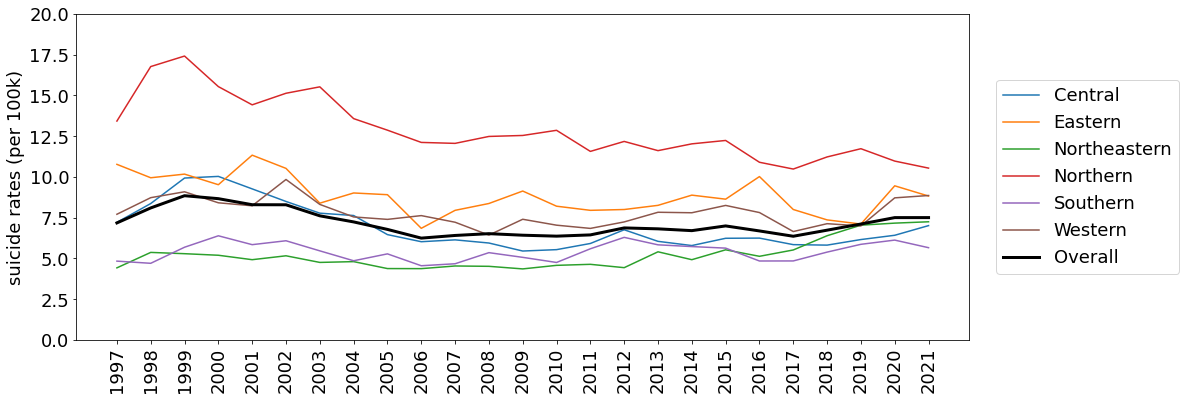

In [18]:
line_plot(data_region, "Thai crude rates by region", 20)

### Top 10 overall and top 5 each region

In [ ]:
line_plot(world, "Top 10 overall age-standardized rate", 120)

In [ ]:
line_plot(asia, "Top 5 Asia age-standardized rate", 120)

In [ ]:
line_plot(europe, "Top 5 Europe age-standardized rate", 120)

In [ ]:
line_plot(africa, "Top 5 Africa age-standardized rate", 120)

In [ ]:
line_plot(americas, "Top 5 Americas age-standardized rate", 120)

In [ ]:
line_plot(oceania, "Top 5 Oceania age-standardized rate", 120)

### Top 10 overall and top 5 each region (Thai)

In [ ]:
line_plot(country, "Top 10 overall Thai crude rate", 40)

In [ ]:
line_plot(northern, "Top 5 northern crude rate", 40)

In [ ]:
line_plot(northeastern, "Top 5 northeastern crude rate", 40)

In [ ]:
line_plot(central, "Top 5 central crude rate", 40)

In [ ]:
line_plot(eastern, "Top 5 eastern crude rate", 40)

In [ ]:
line_plot(western, "Top 5 western crude rate", 40)

In [ ]:
line_plot(southern, "Top 5 southern crude rate", 40)

## Male

### Prepare data

In [ ]:
# suicide data
data_m = pd.read_csv("datasets/Global suicides/age_adjusted_male.csv")

data_merge = data_m.merge(global_map, on = "name")
data_m = data_merge[[
    'name', 'continent',
    "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009",
    "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]]

data_continent_m = data_m.groupby(['continent']).mean().rename_axis(columns = None).reset_index()

data_global_mean = list(data_m.mean())

data_continent_m = pd.melt(
    data_continent_m,
    id_vars = 'continent',
    value_vars = [
        '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
        '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
data_continent_m.rename(columns = {"variable":"year"}, inplace = True)

data_continent_m = data_continent_m.pivot_table(
    values='value', index='year', columns='continent').rename_axis(columns = None).reset_index()
data_continent_m["Global"] = data_global_mean
data_continent_m

In [5]:
data_m = pd.read_csv("datasets/Thai suicides/crude_male.csv")
data_m['region'] = data_m['name'].apply(define_regions)
data_region_m = data_m.groupby(['region']).mean().rename_axis(columns = None).reset_index()

data_overall_mean = list(data_m.mean())

data_region_m = pd.melt(
       data_region_m, id_vars = 'region',
       value_vars = [
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
data_region_m.rename(columns = {"variable":"year"}, inplace = True)

data_region_m = data_region_m.pivot_table(
       values='value', index='year', columns='region').rename_axis(columns = None).reset_index()
data_region_m["Overall"] = data_overall_mean
data_region_m

C:\Users\USER\AppData\Local\Temp/ipykernel_30304/2683845610.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_overall_mean = list(data_m.mean())


,year,Central,Eastern,Northeastern,Northern,Southern,Western,Overall
0,1997,10.789011,15.249540,6.981434,22.779889,7.623951,10.765500,11.091797
1,1998,12.683156,15.056526,8.509668,27.104595,7.290902,12.488310,12.544021
2,1999,14.942937,14.501753,8.533499,28.122678,8.924650,13.219761,13.643849
3,2000,15.013597,14.079095,8.730319,25.694922,9.380021,12.595729,13.433313
4,2001,13.773174,16.122664,8.071001,22.657485,9.155838,11.230509,12.612552
5,2002,12.226363,15.002629,8.457562,23.533226,9.565662,13.860722,12.510817
6,2003,11.317615,12.964707,7.606297,24.809400,8.560513,11.214084,11.637060
7,2004,10.999147,13.663663,7.932119,21.793167,7.538042,10.793095,11.099732
8,2005,9.391848,12.951734,7.184979,20.785455,7.990729,12.031251,10.443404
9,2006,9.198696,10.992373,7.240451,19.885054,7.288803,11.021000,9.908534


### each continent and global mean

In [ ]:
line_plot(data_continent_m, "Global male age-standardized rates by region", 35)

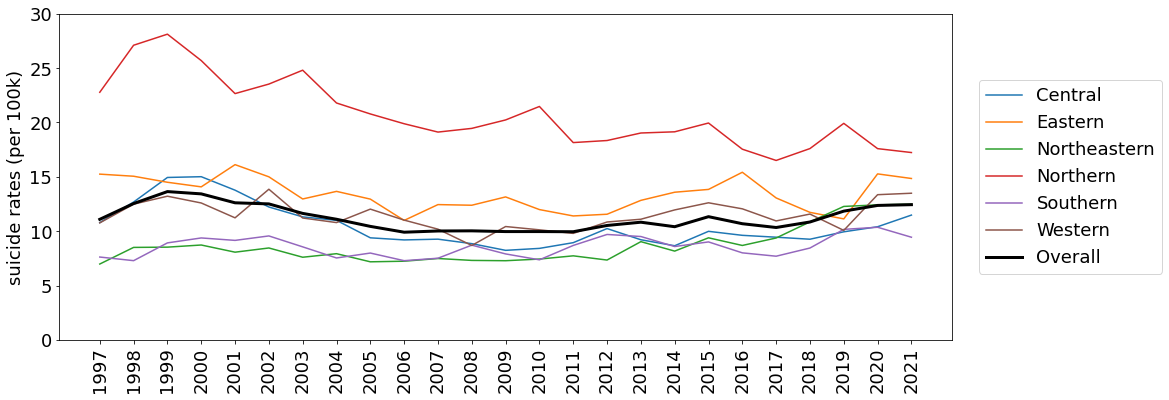

In [25]:
line_plot(data_region_m, "Thai male crude rates by region", 30)

## Female

### Prepare data

In [ ]:
# suicide data
data_f = pd.read_csv("datasets/Global suicides/age_adjusted_female.csv")

# shape file
global_map = gpd.read_file("datasets/Global suicides/countries/countries.shp")
global_map = global_map.iloc[:, [4,5]]

data_merge = data_f.merge(global_map, on = "name")
data_f = data_merge[[
    'name', 'continent',
    "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009",
    "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]]

data_continent_f = data_f.groupby(['continent']).mean().rename_axis(columns = None).reset_index()

data_global_mean = list(data_f.mean())

data_continent_f = pd.melt(
    data_continent_f,
    id_vars = 'continent',
    value_vars = [
        '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
        '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
data_continent_f.rename(columns = {"variable":"year"}, inplace = True)

data_continent_f = data_continent_f.pivot_table(
    values='value', index='year', columns='continent').rename_axis(columns = None).reset_index()
data_continent_f["Global"] = data_global_mean
data_continent_f

In [6]:
data_f = pd.read_csv("datasets/Thai suicides/crude_female.csv")
data_f['region'] = data_f['name'].apply(define_regions)
data_region_f = data_f.groupby(['region']).mean().rename_axis(columns = None).reset_index()

data_overall_mean = list(data_f.mean())

data_region_f = pd.melt(
       data_region_f, id_vars = 'region',
       value_vars = [
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
data_region_f.rename(columns = {"variable":"year"}, inplace = True)

data_region_f = data_region_f.pivot_table(
       values='value', index='year', columns='region').rename_axis(columns = None).reset_index()
data_region_f["Overall"] = data_overall_mean
data_region_f

C:\Users\USER\AppData\Local\Temp/ipykernel_30304/4250615345.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_overall_mean = list(data_f.mean())


,year,Central,Eastern,Northeastern,Northern,Southern,Western,Overall
0,1997,4.037619,6.195952,1.845615,4.203502,2.016042,4.644669,3.377840
1,1998,4.046213,4.743182,2.193652,6.490503,2.095234,4.911626,3.632972
2,1999,5.081411,5.792470,2.031809,6.786384,2.430100,4.945043,4.094277
3,2000,5.233842,4.937950,1.644929,5.464499,3.413495,4.198814,3.956524
4,2001,4.930883,6.547998,1.762535,6.296312,2.548960,5.210495,4.039404
5,2002,4.892747,6.042534,1.854590,6.880523,2.630453,5.784574,4.126647
6,2003,4.351712,3.817485,1.894042,6.358930,2.400599,5.383292,3.640903
7,2004,4.413105,4.420265,1.674716,5.518114,2.202040,4.313410,3.453102
8,2005,3.645662,4.922119,1.568309,5.106758,2.615355,2.805481,3.185625
9,2006,2.984365,2.758990,1.502592,4.477189,1.828981,4.237359,2.643840


In [ ]:
global_data = pd.DataFrame()
global_data["year"] = data_continent["year"]
global_data["Both sexes"] = data_continent["Global"]
global_data["Male"] = data_continent_m["Global"]
global_data["Female"] = data_continent_f["Global"]
global_data

In [7]:
Thai_data = pd.DataFrame()
Thai_data["year"] = data_region["year"]
Thai_data["Both sexes"] = data_region["Overall"]
Thai_data["Male"] = data_region_m["Overall"]
Thai_data["Female"] = data_region_f["Overall"]
Thai_data

,year,Both sexes,Male,Female
0,1997,7.175048,11.091797,3.377840
1,1998,8.093955,12.544021,3.632972
2,1999,8.843006,13.643849,4.094277
3,2000,8.661979,13.433313,3.956524
4,2001,8.291091,12.612552,4.039404
5,2002,8.287072,12.510817,4.126647
6,2003,7.610384,11.637060,3.640903
7,2004,7.236586,11.099732,3.453102
8,2005,6.776945,10.443404,3.185625
9,2006,6.242492,9.908534,2.643840


### each continent and global mean

In [ ]:
line_plot(global_data, "Overall global age-standardized rate", 30)

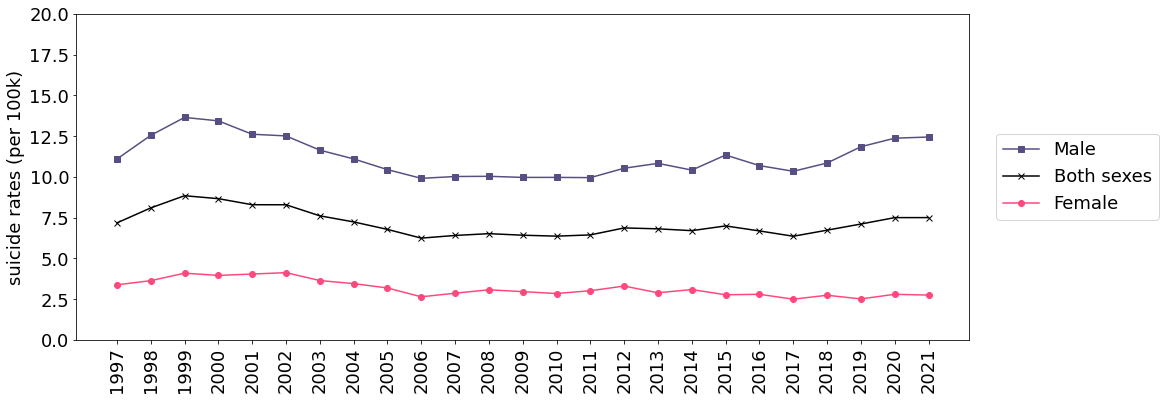

In [9]:
line_plot(Thai_data, "Overall Thai crude rates", 20)

In [ ]:
line_plot(data_continent_f, "Global female age-standardized rates by region", 35)

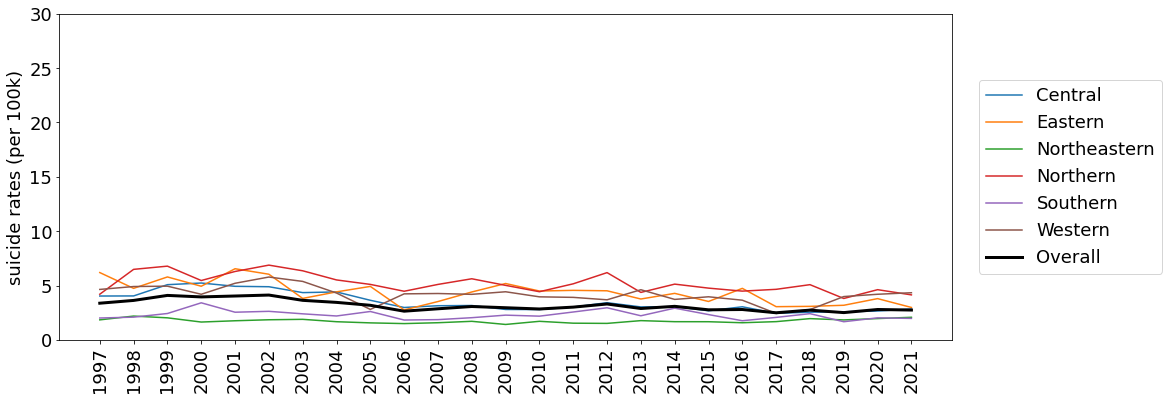

In [26]:
line_plot(data_region_f, "Thai female crude rates by region", 30)

# Map plot

In [19]:
def map_plot(data, column_name, path):
    plotmap = data.plot(
        column = column_name,
        missing_kwds = {"color" : "lightgrey"},
        legend = True,
        legend_kwds = {'shrink': 0.9, "orientation": "horizontal"},
        vmin = 0, vmax = 40 , 
        cmap = 'BuPu',
        figsize=(12, 12))
    plt.axis('off')
    plt.title(
        "{}".format(column_name),
        fontsize = 20)
    plt.savefig(
        'picture/map_plot/{}{}.png'.format(
            path,
            column_name),
        dpi=300,
        format='png',
        bbox_inches='tight')
    plt.show()

## Both sexes

### Prepare data

In [ ]:
map = gpd.read_file("datasets/Global suicides/global_map_256/global_map_256.shp")

data = pd.read_csv("datasets/Global suicides/age_adjusted_both.csv")
data_map = map.merge(data, on = "name", how = "left")
data_map

In [ ]:
data2 = pd.read_csv("datasets/Global suicides/age_specific_both.csv")
data2 = data2.iloc[: , 1:]

data2_map = map.merge(data2, on = "name", how = "left")
data2_map

In [20]:
data = pd.read_csv("datasets/Thai suicides/crude_both.csv")
data.sort_values(by = "name", inplace = True)
data.reset_index(drop = True, inplace = True)

map = gpd.read_file("datasets/Thai suicides/gadm41_THA/gadm41_THA_1.shp")
map.rename(columns = {"NAME_1" : "name"}, inplace = True)
data_map = map.merge(data, on = "name")
data_map

,GID_1,GID_0,COUNTRY,name,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,THA.1_1,THA,Thailand,Amnat Charoen,NA,จังหวัดอำนาจเจริญ,Changwat,Province,37,TH.AC,...,2.681914,5.880843,4.532862,4.260985,3.191600,5.041941,4.767189,6.088876,5.842843,6.125183
1,THA.2_1,THA,Thailand,Ang Thong,NA,จังหวัดอ่างทอง,Changwat,Province,15,TH.AT,...,8.099390,4.932930,4.935660,6.002719,6.726902,7.106512,6.414345,7.146992,6.121516,7.629040
2,THA.3_1,THA,Thailand,Bangkok Metropolis,Bangkok|Krung Thep|Krung Thep Ma,จังหวัดเชียงใหม่,Changwat,Province,10,TH.BM,...,2.202953,1.672563,1.704965,2.141980,3.643590,3.938192,2.690533,2.678345,4.309835,4.507157
3,THA.4_1,THA,Thailand,Bueng Kan,NA,บึงกาฬ,Changwat,Province,NA,TH.BK,...,2.682116,6.273753,5.989444,5.246490,7.133159,6.164921,4.966194,5.905614,9.471468,6.172151
4,THA.5_1,THA,Thailand,Buri Ram,Buri Rum,จังหวัดบุรีรัมย์,Changwat,Province,31,TH.BR,...,6.142380,5.413702,5.645979,4.743239,6.373265,5.477617,8.293374,6.903330,7.752866,8.552651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,THA.73_1,THA,Thailand,Udon Thani,NA,จังหวัดอุดรธานี,Changwat,Province,41,TH.UN,...,4.057440,4.805748,4.530569,5.094399,5.662003,5.904113,7.412556,6.774463,7.643979,10.513764
73,THA.74_1,THA,Thailand,Uthai Thani,NA,จังหวัดอุทัยธานี,Changwat,Province,61,TH.UT,...,10.654750,9.415567,4.850572,6.357645,7.572361,7.886770,9.112863,4.870179,6.120681,5.845704
74,THA.75_1,THA,Thailand,Uttaradit,NA,จังหวัดอุตรดิตถ์,Changwat,Province,53,TH.UD,...,12.359948,7.156116,7.380106,7.615616,5.677153,6.569871,9.885526,8.385060,10.003535,8.065438
75,THA.76_1,THA,Thailand,Yala,NA,จังหวัดยะลา,Changwat,Province,95,TH.YL,...,3.418528,2.184811,1.768090,1.166525,2.505498,1.337404,0.946342,2.439885,2.425586,2.040968


### Plot

In [ ]:
years = ['2000', '2001', '2002', '2003', '2004',
         '2005', '2006', '2007', '2008', '2009',
         '2010', '2011', '2012', '2013', '2014',
         '2015', '2016', '2017', '2018', '2019']

In [ ]:
for year in years :
    map_plot(data_map, year, "Global/age_standardized/both_sexes/")

In [ ]:
ages_group = ['85+ years', '75-84 years', '65-74 years', '55-64 years',
              '45-54 years', '35-44 years', '25-34 years', '15-24 years']

for age_group in ages_group :
    map_plot(data2_map, age_group, "Global/age_specific/both_sexes/")

In [21]:
years = ['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [ ]:
for year in years :
    map_plot(data_map, year, "Thai/both_sexes/")

## Male

### Prepare data

In [ ]:
data_m = pd.read_csv("datasets/Global suicides/age_adjusted_male.csv")
data_map_m = map.merge(data_m, on = "name", how = "left")

data_map_m

In [ ]:
data2_m = pd.read_csv("datasets/Global suicides/age_specific_male.csv")
data2_m = data2_m.iloc[: , 1:]

data2_map_m = map.merge(data2_m, on = "name", how = "left")
data2_map_m

In [ ]:
data_m = pd.read_csv("datasets/Thai suicides/crude_male.csv")
data_m.sort_values(by = "name", inplace = True)
data_m.reset_index(drop = True, inplace = True)

map = gpd.read_file("datasets/Thai suicides/gadm41_THA/gadm41_THA_1.shp")
map.rename(columns = {"NAME_1" : "name"}, inplace = True)
data_map_m = map.merge(data_m, on = "name")
data_map_m

### Plot

In [ ]:
for year in years :
    map_plot(data_map_m, year, "Global/age_standardized/male/")

In [ ]:
for age_group in ages_group :
    map_plot(data2_map_m, age_group, "Global/age_specific/male/")

In [ ]:
for year in years :
    map_plot(data_map_m, year, "Thai/male/")

## Female

### Prepare data

In [ ]:
data_f = pd.read_csv("datasets/Global suicides/age_adjusted_female.csv")
data_map_f = map.merge(data_f, on = "name", how = "left")

data_map_f

In [ ]:
data2_f = pd.read_csv("datasets/Global suicides/age_specific_female.csv")
data2_f = data2_f.iloc[: , 1:]

data2_map_f = map.merge(data2_f, on = "name", how = "left")
data2_map_f

In [ ]:
data_f = pd.read_csv("datasets/Thai suicides/crude_female.csv")
data_f.sort_values(by = "name", inplace = True)
data_f.reset_index(drop = True, inplace = True)

map = gpd.read_file("datasets/Thai suicides/gadm41_THA/gadm41_THA_1.shp")
map.rename(columns = {"NAME_1" : "name"}, inplace = True)
data_map_f = map.merge(data_f, on = "name")
data_map_f

### Plot

In [ ]:
for year in years :
    map_plot(data_map_f, year, "Global/age_standardized/female/")

In [ ]:
for age_group in ages_group :
    map_plot(data2_map_f, age_group, "Global/age_specific/female/")

In [ ]:
for year in years :
    map_plot(data_map_f, year, "Thai/female/")

# Correlation between continuous risk factors

In [ ]:
risk_factors = pd.read_csv("datasets/Global suicides/0-cleaned_filled_risk_factor_37.csv")
risk_factors

In [ ]:
corr_mat = risk_factors.corr()
df = pd.DataFrame(corr_mat)

In [ ]:
strong_neg = []
strong_pos = []
for i in range(37) :
    for j in range(37) :
        if df.iloc[i,j] <= -0.8 :
            strong_neg.append([i + 1, j + 1])
        elif df.iloc[i,j] >= 0.8 :
            strong_pos.append([i + 1, j + 1])

In [ ]:
import networkx as nx

strong_pos_df = pd.DataFrame(strong_pos, columns=['source','target'])
G = nx.from_pandas_edgelist(strong_pos_df)

strong_pos_group = [x for x in nx.connected_components(G)]
strong_pos_group

In [ ]:
strong_neg_df = pd.DataFrame(strong_neg, columns=['source','target'])
G2 = nx.from_pandas_edgelist(strong_neg_df)

strong_neg_group = [x for x in nx.connected_components(G2)]
strong_neg_group

In [ ]:
plt.figure(figsize = (30, 27))
sn.heatmap(corr_mat, cmap = 'BuPu', annot=True)
plt.savefig(
    'picture/risk_factors_coor.png',
    dpi=300,
    format='png',
    bbox_inches='tight')
plt.show()

In [ ]:
def color_cell(val):
  color = '#fcba03' if val <= 0.05 else 'none'
  return 'background-color: %s' % color

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

#p-value of all years correlation
pval = risk_factors.corr(method = lambda x, y: pearsonr(x, y)[1]) - np.eye(*corr_mat.shape)
pval.style.applymap(color_cell)

# Thai risk factors trends by provinces

In [ ]:
def line_plot3(data, path) :
    colors = list(mcolors.CSS4_COLORS.values())
    colors2 = ['#808080', '#574E83', '#FF487E']
    column = data.iloc[:,1:]

    r = 0 
    for i in column:
        lines = plt.plot('Year', i, data = data)
        plt.setp(lines, color = colors[r])
        r = r + 1
    
    plt.title(path)

    plt.savefig(
    '{}.png'.format(path),
    dpi=300,
    format='png',
    bbox_inches='tight')
    plt.show()

In [ ]:
data = pd.read_csv("datasets/Thai suicides/risk factors/77 provinces/shocking crime 77.csv")
data['Year'] = data['Year'].astype(str)
data

In [ ]:
line_plot3(data, "shocking crime")